In [35]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt


In [36]:
# 计算NDVI
def calculate_ndvi(image_path, nir_band_number,red_band_number):
    with rasterio.open(image_path) as src:
        band_red = src.read(red_band_number).astype(np.float32)
        band_nir = src.read(nir_band_number).astype(np.float32)
        # 处理异常值
        band_red[band_red>100] = np.median(band_red)
        band_nir[band_nir>100] = np.median(band_nir)
        # 计算NDVI
        ndvi = (band_nir - band_red) / (band_nir + band_red)
        
        # 处理除以零的情况
        ndvi[np.isnan(ndvi)] = 0

        return ndvi
# 计算SAVI
def calculate_savi(image_path, nir_band_number, red_band_number):
    L = 0.5
    with rasterio.open(image_path) as src:
        band_red = src.read(red_band_number).astype(np.float32)
        band_nir = src.read(nir_band_number).astype(np.float32)
        
        # 适当修改异常值处理逻辑，确保它适用于您的数据范围
        # 处理异常值
        band_red[band_red > 100] = np.median(band_red)
        band_nir[band_nir > 100] = np.median(band_nir)
        
        # 计算SAVI
        savi = (band_nir - band_red) / (band_nir + band_red + L) * (1.0 + L)
        
        # 处理除以零的情况
        savi[np.isnan(savi)] = 0
        return savi

# 计算NDWI
def calculate_ndwi(image_path,nir_band_number, green_band_number):
    with rasterio.open(image_path) as src:
        band_green = src.read(green_band_number).astype(np.float32)
        band_nir = src.read(nir_band_number).astype(np.float32)
        # 适当修改异常值处理逻辑，确保它适用于您的数据范围
        # 处理异常值
        band_green[band_green > 100] = np.median(band_green)
        band_nir[band_nir > 100] = np.median(band_nir)
        # 计算NDWI
        ndwi = (band_green - band_nir) / (band_green + band_nir)
        
        # 处理除以零的情况
        ndwi[np.isnan(ndwi)] = 0
        return ndwi
def calculate_evi(image_path, nir_band_number, red_band_number, blue_band_number):
    G = 2.5
    C1 = 6.0
    C2 = 7.5
    L = 1.0
    with rasterio.open(image_path) as src:
        band_red = src.read(red_band_number).astype(np.float32)
        band_nir = src.read(nir_band_number).astype(np.float32)
        band_blue = src.read(blue_band_number).astype(np.float32)
        
        # 适当修改异常值处理逻辑，确保它适用于您的数据范围
        # 例如，如果您知道数据是归一化的反射率，可能需要调整这里的阈值
        band_red[band_red > 1] = np.median(band_red)
        band_nir[band_nir > 1] = np.median(band_nir)
        band_blue[band_blue > 1] = np.median(band_blue)
        
        # 计算EVI
        evi = G * (band_nir - band_red) / (band_nir + C1 * band_red - C2 * band_blue + L)
        
        # 处理除以零的情况
        evi[np.isnan(evi)] = 0
        
        return evi

In [40]:
# 源TIF路径
image_path = r"F:\cache_data\tif_file_sentinel\gl\gl_bands14.tif"
# 使用下载的Sentinel-2图像
# ndvi = calculate_ndvi(image_path,8,4)
# savi = calculate_savi(image_path,8,4)
# ndwi = calculate_ndwi(image_path,8,3)
evi = calculate_evi(image_path,8,4,2)


In [4]:
# NDVI存储路径
ndvi_out_path = r"F:\cache_data\tif_file_texture\gl\one_bands\NDVI.tif"
# SAVI存储路径
savi_out_path = r"F:\cache_data\tif_file_texture\gl\one_bands\SAVI.tif"
# NDWI存储路径
ndwi_out_path = r"F:\cache_data\tif_file_texture\gl\one_bands\NDWI.tif"
# 保存为TIF文件
for one_file in [ndvi_out_path, savi_out_path, ndwi_out_path]:
    with rasterio.open(image_path) as src:
        with rasterio.open(
            one_file,
            'w',
            driver='GTiff',
            height=ndvi.shape[0],
            width=ndvi.shape[1],
            count=1,
            dtype=ndvi.dtype,
            crs=src.crs,
            transform=src.transform
        ) as dst:
            dst.write(ndvi, 1)

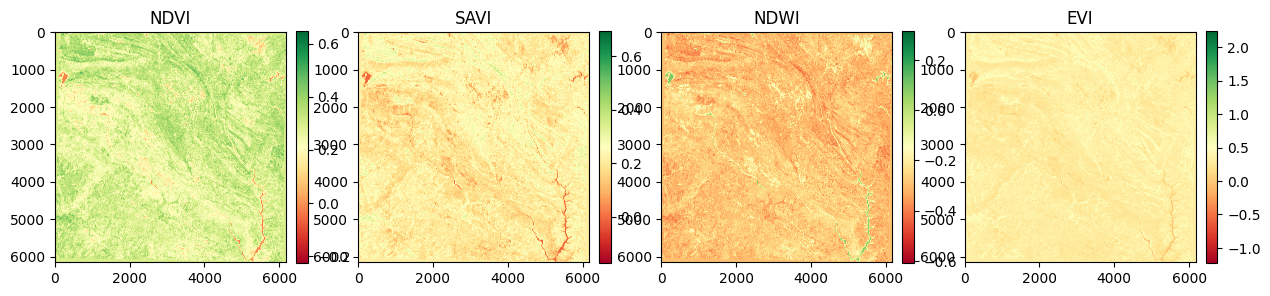

In [39]:
# 创建一个画布和三个子图
fig, axs = plt.subplots(1, 4, figsize=(15, 5))  # 1行3列的子图布局

# 分别在三个子图中显示NDVI图像
img1 = axs[0].imshow(ndvi, cmap='RdYlGn')
img2 = axs[1].imshow(savi, cmap='RdYlGn')
img3 = axs[2].imshow(ndwi, cmap='RdYlGn')
img4 = axs[3].imshow(evi, cmap='RdYlGn')

# 为每张图添加颜色条
fig.colorbar(img1, ax=axs[0], fraction=0.046, pad=0.04)
fig.colorbar(img2, ax=axs[1], fraction=0.046, pad=0.04)
fig.colorbar(img3, ax=axs[2], fraction=0.046, pad=0.04)
fig.colorbar(img4, ax=axs[3], fraction=0.046, pad=0.04)

# 为每个子图设置标题
axs[0].set_title('NDVI')
axs[1].set_title('SAVI')
axs[2].set_title('NDWI')
axs[3].set_title('EVI')

# 显示图像
plt.show()

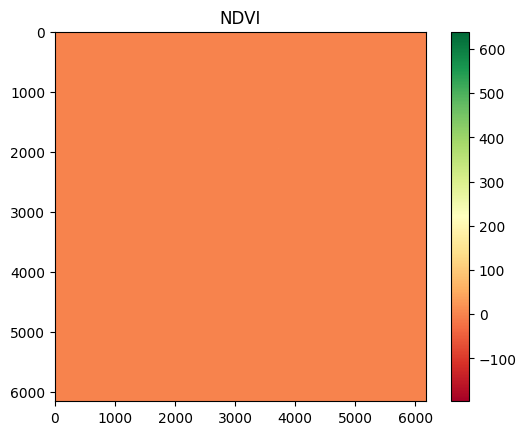

In [41]:
# 可视化NDVI
plt.imshow(evi, cmap='RdYlGn')
plt.colorbar()
plt.title('NDVI')
plt.show()

In [ ]:
# SAVI存储路径
out_path = r"F:\cache_data\tif_file_texture\gl\one_bands\savi.tif"
# 保存NDVI为TIF文件
with rasterio.open(image_path) as src:
    with rasterio.open(
        out_path,
        'w',
        driver='GTiff',
        height=ndvi.shape[0],
        width=ndvi.shape[1],
        count=1,
        dtype=ndvi.dtype,
        crs=src.crs,
        transform=src.transform
    ) as dst:
        dst.write(ndvi, 1)